In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

In [ ]:
df = pd.read_csv("data/제주도 방문 내국인 유동인구 추이.csv",encoding='cp949')

In [ ]:
df['time_range'].astype(str)

0          1-2시
1        11-12시
2        13-14시
3        15-16시
4        17-18시
          ...  
18811    13-14시
18812    15-16시
18813    17-18시
18814    19-20시
18815    21-22시
Name: time_range, Length: 18816, dtype: object

In [ ]:
df['time_range'] = df['time_range'].str.split('-').str[0]
df['time_range'] = df['time_range'].astype('int')

In [ ]:
df['time_range']
def time(x):
    if x < 12:
        return 'AM'
    elif x > 12:
        return 'PM'
    
df['time'] = df['time_range'].apply(time)
df

,base_year_month,sex,age_range,time_range,visit_population_count,time
0,201801,남성,10세 미만,1,784277.63,AM
1,201801,남성,10세 미만,11,1088787.98,AM
2,201801,남성,10세 미만,13,1200092.88,PM
3,201801,남성,10세 미만,15,1281607.29,PM
4,201801,남성,10세 미만,17,1311753.45,PM
...,...,...,...,...,...,...
18811,202209,여성,7000,13,56686.00,PM
18812,202209,여성,7000,15,51907.00,PM
18813,202209,여성,7000,17,37035.00,PM
18814,202209,여성,7000,19,24493.00,PM


In [ ]:
df['base_year_month'] = (df['base_year_month']*0.01).astype('int')
df

,base_year_month,sex,age_range,time_range,visit_population_count,time
0,2018,남성,10세 미만,1,784277.63,AM
1,2018,남성,10세 미만,11,1088787.98,AM
2,2018,남성,10세 미만,13,1200092.88,PM
3,2018,남성,10세 미만,15,1281607.29,PM
4,2018,남성,10세 미만,17,1311753.45,PM
...,...,...,...,...,...,...
18811,2022,여성,7000,13,56686.00,PM
18812,2022,여성,7000,15,51907.00,PM
18813,2022,여성,7000,17,37035.00,PM
18814,2022,여성,7000,19,24493.00,PM


In [ ]:
df['age'] = df['age_range'].str.split(' ').str[0]
df['age'] = df['age_range'].str.split('세').str[0]

In [ ]:
df['age'] = df['age'].astype('int')

In [ ]:
def age_line(x):
    if x > 100:
        return x/100
    else :
        return x    
df['age_line'] = df['age'].apply(age_line)
df['age_line'] = df['age_line'].astype('int')

In [ ]:
df['age_line'].unique()

array([10, 19, 29, 39, 49, 59, 69, 79, 80,  9, 15, 20, 25, 30, 35, 40, 45,
       50, 55, 60, 65, 70])

In [ ]:
df['age_line']= (df['age_line']//10)*10
df['age_line'].unique()

array([10, 20, 30, 40, 50, 60, 70, 80,  0])

In [ ]:
df.drop(['time_range','age_range','age'], axis=1,inplace=True)

In [ ]:
df['visit_population_count'] = df['visit_population_count'].astype('int')

In [ ]:
df.columns=['year','sex','visit_population_count','time','age_line']
df = df.sort_values(by='age_line')
df = df[df.age_line !=0]
df = df.sort_index().reset_index()
df

,index,year,sex,visit_population_count,time,age_line
0,0,2018,남성,784277,AM,10
1,1,2018,남성,1088787,AM,10
2,2,2018,남성,1200092,PM,10
3,3,2018,남성,1281607,PM,10
4,4,2018,남성,1311753,PM,10
...,...,...,...,...,...,...
18763,18811,2022,여성,56686,PM,70
18764,18812,2022,여성,51907,PM,70
18765,18813,2022,여성,37035,PM,70
18766,18814,2022,여성,24493,PM,70


In [ ]:
data_people = df.groupby(['year','sex','time','age_line'],as_index = False).agg(people_count = ('visit_population_count', 'sum'))
data_people

,year,sex,time,age_line,people_count
0,2018,남성,AM,10,108940492
1,2018,남성,AM,20,85878328
2,2018,남성,AM,30,92628488
3,2018,남성,AM,40,118666649
4,2018,남성,AM,50,115073532
...,...,...,...,...,...
155,2022,여성,PM,40,72148033
156,2022,여성,PM,50,73326177
157,2022,여성,PM,60,48368419
158,2022,여성,PM,70,20356812


In [ ]:
data_people.to_csv('data/data_people.csv',index = False)

In [ ]:
data_year_time = data_people.groupby(['year','time'],as_index =False).agg(people_sum = ('people_count', 'sum'))
data_year_time

,year,time,people_sum
0,2018,AM,1148163777
1,2018,PM,1617817074
2,2019,AM,1178972659
3,2019,PM,1635000909
4,2020,AM,1083178347
5,2020,PM,1505360095
6,2021,AM,1185193926
7,2021,PM,1640756780
8,2022,AM,639271825
9,2022,PM,864747254


In [ ]:
data_year = data_people.groupby('year',as_index =False).agg(people_sum = ('people_count', 'sum'))
data_year

,year,people_sum
0,2018,2.765981e+09
1,2019,2.813974e+09
2,2020,2.588538e+09
3,2021,2.825951e+09
4,2022,1.504019e+09


In [ ]:
data_people

,year,sex,time,age_line,people_count
0,2018,남성,AM,10,108940492
1,2018,남성,AM,20,85878328
2,2018,남성,AM,30,92628488
3,2018,남성,AM,40,118666649
4,2018,남성,AM,50,115073532
...,...,...,...,...,...
155,2022,여성,PM,40,72148033
156,2022,여성,PM,50,73326177
157,2022,여성,PM,60,48368419
158,2022,여성,PM,70,20356812


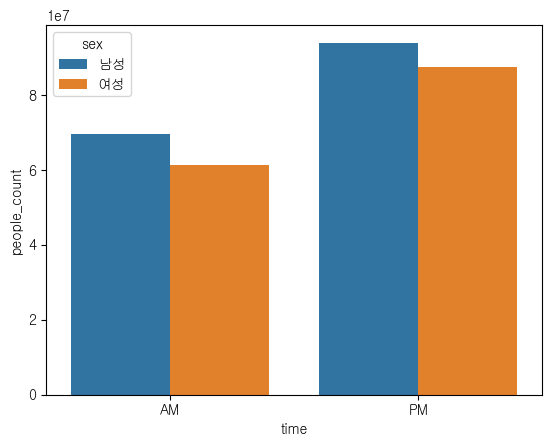

In [ ]:
sns.barplot(data = data_people, x='time', y='people_count', hue='sex',ci=None )
plt.title('성별별 시간대')
plt.show()

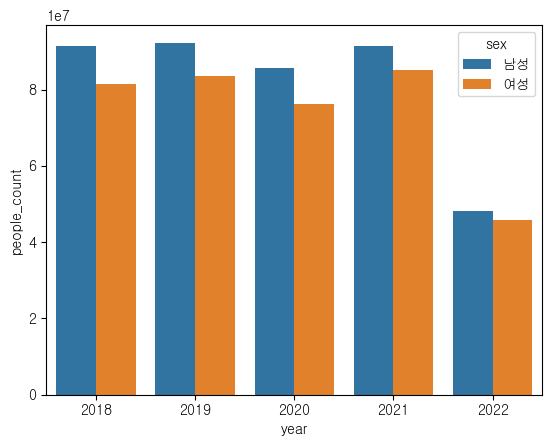

In [ ]:
sns.barplot(data = data_people, x='year', y='people_count', hue='sex',ci=None )
plt.show()

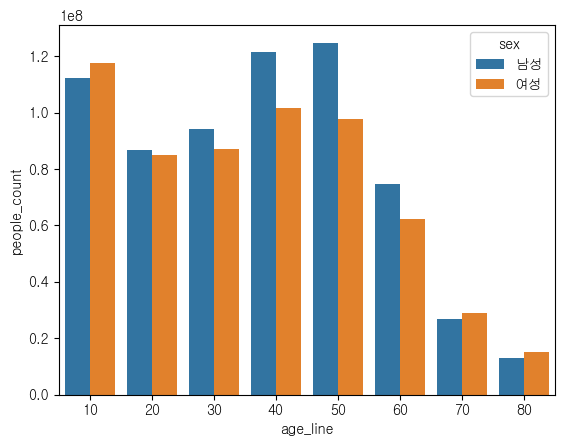

In [ ]:
sns.barplot(data = data_people, x='age_line', y='people_count', hue='sex',ci=None )
plt.show()

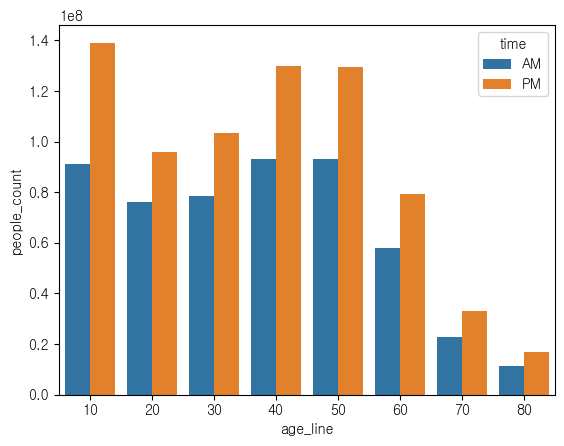

In [ ]:
sns.barplot(data = data_people, x='age_line', y='people_count', hue='time',ci=None )
plt.show()

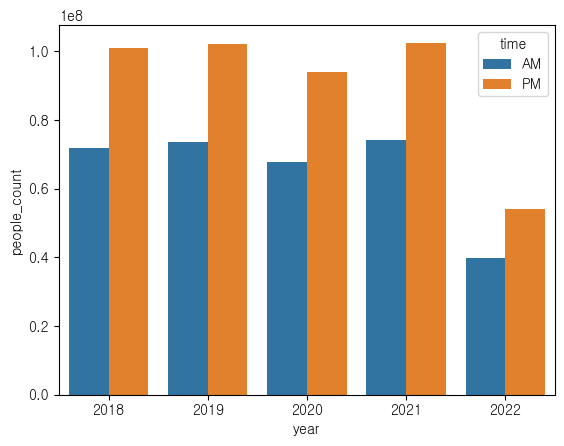

In [ ]:
sns.barplot(data = data_people, x='year', y='people_count', hue='time',ci=None )
plt.show()

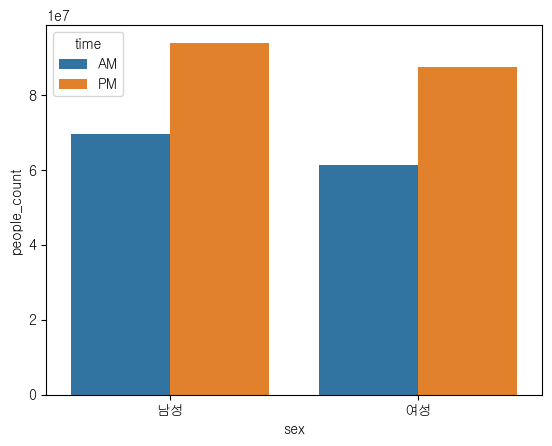

In [ ]:
sns.barplot(data = data_people, x='sex', y='people_count', hue='time',ci=None )
plt.show()

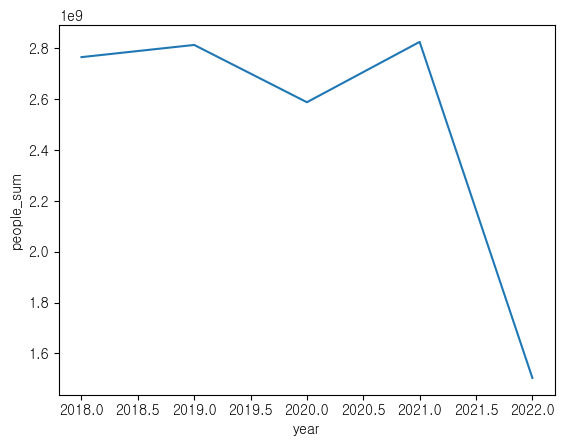

In [ ]:
sns.lineplot(data = data_year, x='year', y='people_sum',ci=None )
plt.show()

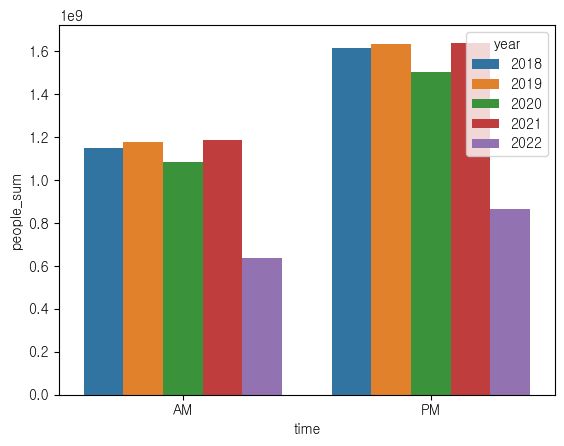

In [ ]:
sns.barplot(data = data_year_time, x='time', y='people_sum',hue='year',ci=None )
plt.show()